In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
import pmdarima as pm


C:\Users\Steve\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Steve\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
dam_lev=pd.read_csv('chennai_reservoir_levels.csv', index_col='Date')
dam_lev['total_dam_lvl']=dam_lev['POONDI']+ dam_lev['CHOLAVARAM']+ dam_lev['REDHILLS']+ dam_lev['CHEMBARAMBAKKAM']

In [3]:
print(dam_lev.info())
print(dam_lev.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 5836 entries, 01-01-2004 to 23-12-2019
Data columns (total 5 columns):
POONDI             5836 non-null float64
CHOLAVARAM         5836 non-null float64
REDHILLS           5836 non-null float64
CHEMBARAMBAKKAM    5836 non-null float64
total_dam_lvl      5836 non-null float64
dtypes: float64(5)
memory usage: 273.6+ KB
None
            POONDI   CHOLAVARAM     REDHILLS  CHEMBARAMBAKKAM  total_dam_lvl
count  5836.000000  5836.000000  5836.000000      5836.000000    5836.000000
mean   1116.271270   234.265965  1533.680166      1285.674289    4169.891690
std    1020.316805   272.289990   906.251292       964.355749    2977.163942
min       0.900000     0.000000     0.000000         0.000000       0.900000
25%     200.225000    18.375000   791.000000       408.000000    1660.600000
50%     775.500000    91.000000  1596.000000      1190.000000    3669.500000
75%    1975.000000   445.000000  2212.250000      2047.000000    6407.000000
max    3231.000

In [4]:
dam=pd.DataFrame(columns=['dam_level'], index=dam_lev.index)
dam.index=pd.to_datetime(dam.index)
dam['dam_level']=dam_lev['total_dam_lvl']
dam.head()

,dam_level
Date,
2004-01-01,271.9
2004-02-01,271.9
2004-03-01,270.9
2004-04-01,270.9
2004-05-01,270.8


In [5]:
dam=dam.resample('W').mean()


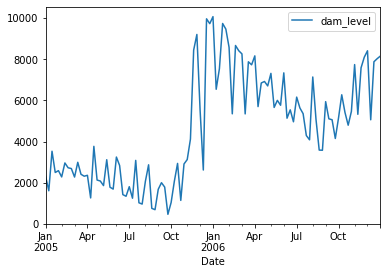

In [6]:
dam['2005':'2006'].plot()

In [7]:
dam_result=adfuller(dam['dam_level'])
print(dam_result)

(-3.1376310894689823, 0.02389078237289567, 21, 813, {'1%': -3.4384189633001956, '5%': -2.86510158480911, '10%': -2.568666500743605}, 13267.424544559217)


(-7.025319315698454, 6.386779552770311e-10, 21, 812, {'1%': -3.4384289321263126, '5%': -2.865105979079729, '10%': -2.568668841575869}, 13255.233089563337)


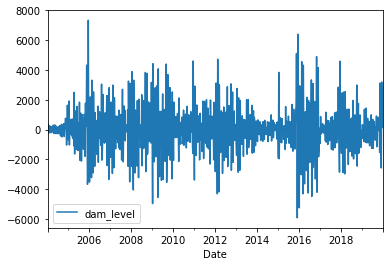

In [8]:
dam_diff=dam.diff().dropna()
dam_result=adfuller(dam_diff['dam_level'])
print(dam_result)
dam_diff.plot()

C:\Users\Steve\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:409: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


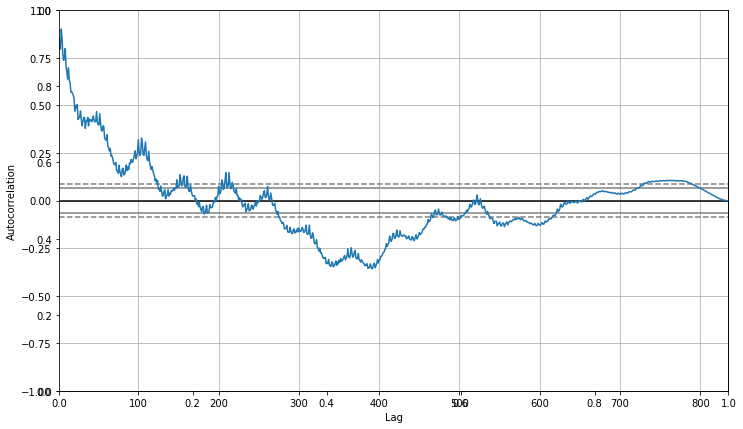

In [9]:
fig, ax = plt.subplots(figsize=(12,7))
autocorrelation_plot(dam) 
plt.show()

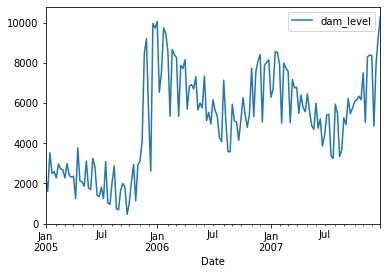

In [10]:
dam['2005':'2007'].plot()

In [11]:
# dam_model = pm.auto_arima(dam,
#                       seasonal=True, m=22,
#                       d=1, D=1, 
#                       start_p=1, start_q=1,
#                       max_p=15, max_q=15,
#                       max_P=15, max_Q=15,
#                       trace=True,
#                       error_action='ignore',
#                       suppress_warnings=True) 


# # Print model summary
# print(dam_model.summary())

In [12]:
dam_model=sm.tsa.SARIMAX(dam, order=(3, 1, 4), seasonal_order=(1,1,2,22))
dam_results = dam_model.fit()
print(dam_results.summary())


C:\Users\Steve\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                          dam_level   No. Observations:                  835
Model:             SARIMAX(3, 1, 4)x(1, 1, 2, 22)   Log Likelihood               -6742.205
Date:                            Tue, 16 Jun 2020   AIC                          13506.410
Time:                                    12:52:45   BIC                          13558.104
Sample:                                01-04-2004   HQIC                         13526.255
                                     - 12-29-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4910      0.044    -11.225      0.000      -0.577      -0.405
ar.L2         -0.5040      0.036   

In [13]:
dam_mae = np.mean(np.abs(dam_results.resid))
print("Mean Absolute Error",dam_mae)

Mean Absolute Error 665.5685405222002


In [14]:
# dam_arima_pred = dam_results.get_forecast(steps=-10)
# dam_arima_mean = dam_arima_pred.predicted_mean
# dam_test['predicted']=dam_arima_mean
# print(dam_test)

              dam_level  mean_forecast
Date                                  
2009-06-07  7712.857143            NaN
2009-06-14  4299.714286            NaN
2009-06-21  5508.428571            NaN
2009-06-28  5186.571429            NaN
2009-07-05  7581.000000            NaN
2009-07-12  4229.714286            NaN
2009-07-19  4241.142857            NaN
2009-07-26  3949.714286            NaN
2009-08-02  5300.714286            NaN
2009-08-09  5886.142857            NaN
2009-08-16  3754.285714            NaN
2009-08-23  3178.285714            NaN
2009-08-30  2982.857143            NaN
2009-09-06  7384.285714            NaN
2009-09-13  3840.428571            NaN
2009-09-20  2455.000000            NaN
2009-09-27  2510.571429            NaN
2009-10-04  6204.857143            NaN
2009-10-11  4464.714286            NaN
2009-10-18  3337.714286            NaN
2009-10-25  2828.714286            NaN
2009-11-01  3850.857143            NaN
2009-11-08  6675.142857            NaN
2009-11-15  4626.792857  

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


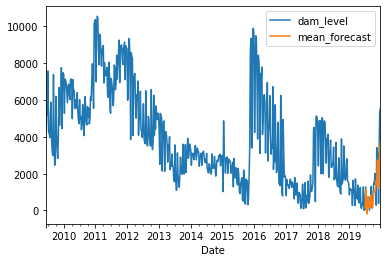

In [15]:
one_step_forecast = dam_results.get_prediction(start=-52)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean
test_df=dam['2009':]
test_df['mean_forecast']=mean_forecast
print(test_df.head(30))


test_df.plot()